In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

## Retrieving income and population data
data acquired from bme.ibge.gov.br related to income.

In [2]:
def load_income_91_00(year=1991):
    df = pd.read_csv(
        f'../data/economy/income/income all sources {year} census bme.csv'
        , sep=';'
        , encoding='ANSI'
        , decimal=','
        , thousands='.'
    )

    df.drop(
        labels= [
            'Código do Nível Geográfico'
            , 'Nível Geográfico'
            , 'Item Geográfico'
            , 'Código do Item Temporal'
            , 'Nível Temporal'
            , 'Ordem Geográfica'
            , 'Freqüência'
            , 'Observações']
        , axis=1
        , inplace=True
    )
    
    df.columns = ['Cod', 'Year', 'GrossIncome']
    
    return df

In [3]:
df_income_1991 = load_income_91_00(year=1991)

df_income_2000 = load_income_91_00(year=2000)

df_income_2010 = load_income_91_00(year=2010)

In [4]:
# correção dos valores de julho de 2000 e julho de 2010 para 31 de dezembro de 2018
df_income_2000['GrossIncomeDeflated'] = (df_income_2000.GrossIncome * 3.15907400).astype(np.int64)
df_income_2010['GrossIncomeDeflated'] = (df_income_2010.GrossIncome * 1.63968750).astype(np.int64)

In [5]:
df_pop = pd.read_csv('../data/pop/Tabela 200sidra  - pop 1970 a 2010.csv', sep=';', na_values='...')

In [6]:
# carregando dados populacionais
df_pop.rename(columns={'Cód.':'Cod'}, inplace=True)

In [7]:
df_income_2000 = df_income_2000.merge(
    right=df_pop[['Cod', '2000']].dropna().astype(np.int64)
    , on='Cod'
    , how='left'
)

In [8]:
df_income_2010 = df_income_2010.merge(
    right=df_pop[['Cod', '2010']].dropna().astype(np.int64)
    , on='Cod'
    , how='left'
)

In [9]:
df_income_2000.rename(columns={'2000':'pop'}, inplace=True)
df_income_2010.rename(columns={'2010':'pop'}, inplace=True)

In [10]:
pd.concat(objs=[df_income_2000, df_income_2010], axis=0)

Cod  Year  GrossIncome  GrossIncomeDeflated      pop
0     5200050  2000       975424              3081436     4971
1     3100104  2000      1194737              3774262     6446
2     5200100  2000      1923252              6075695    11452
3     3100203  2000      5675485             17929277    22360
4     1500107  2000     12187142             38500083   119152
...       ...   ...          ...                  ...      ...
5560  5222005  2010      8109763             13297477    12548
5561  5222054  2010      4514614              7402556     7371
5562  5222203  2010      1751646              2872152     4735
5563  5222302  2010      1848164              3030411     5145
5564  5300108  2010   4253044160           6973663346  2570160

[11072 rows x 5 columns]

In [11]:
df_territory = pd.read_csv('../data/territory/list_arranjos_pop.csv', sep=';')

In [12]:
df_territory = df_territory[~df_territory['Territory'].str.startswith('Demais')]

In [13]:
df_territory.rename(columns={'Territory':'Metropolitan Area'}, inplace=True)

In [14]:
df_income_2000_2010 = pd.concat(objs=[df_income_2000, df_income_2010], axis=0)

In [15]:
df_income_2000_2010 = df_income_2000_2010.merge(right=df_territory, on='Cod')

In [16]:
df_income_2000_2010 = df_income_2000_2010.groupby(by=['Metropolitan Area', 'Year'], as_index=False).sum()

In [17]:
df_income_2000_2010['Income Per Capita'] = (df_income_2000_2010['GrossIncomeDeflated'] / df_income_2000_2010['pop']).astype(np.int64)

In [18]:
df_income_2000_2010[df_income_2000_2010['Year'] == 2010]

Metropolitan Area  Year        Cod  GrossIncome  GrossIncomeDeflated  \
1     Belo Horizonte  2010   72201369   5029468006           8246755809   
3              Belém  2010    6008125   1446200381           2371316686   
5           Brasília  2010   47008418   4669901655           7657179367   
7           Campinas  2010   28274994   2165419011           3550610480   
9           Curitiba  2010   73979386   3606614703           5913721037   
11     Florianópolis  2010   42089297   1185795747           1944334459   
13         Fortaleza  2010   18444706   2296752742           3765956757   
15           Goiânia  2010   78142510   2174111920           3564864130   
17            Manaus  2010    1302603   1327660607           2176948501   
19      Porto Alegre  2010  125027465   4254620420           6976247905   
21            Recife  2010   39110355   2790532527           4575601295   
23    Rio de Janeiro  2010   69369985  12837485818          21049465017   
25          Salvador  2010   29199223   2953506229           4842827241   
27         São Paulo  2010  130597682  23028791020          37760020758   
29           Vitória  2010   19224127   1613175467           2645103646   

         pop  Income Per Capita  
1    4744706               1738  
3    2025276               1170  
5    3360552               2278  
7    1874442               1894  
9    3054076               1936  
11    883808               2199  
13   3327021               1131  
15   2078399               1715  
17   1802014               1208  
19   3701482               1884  
21   3741904               1222  
23  11946398               1761  
25   3482615               1390  
27  19629394               1923  
29   1582418               1671

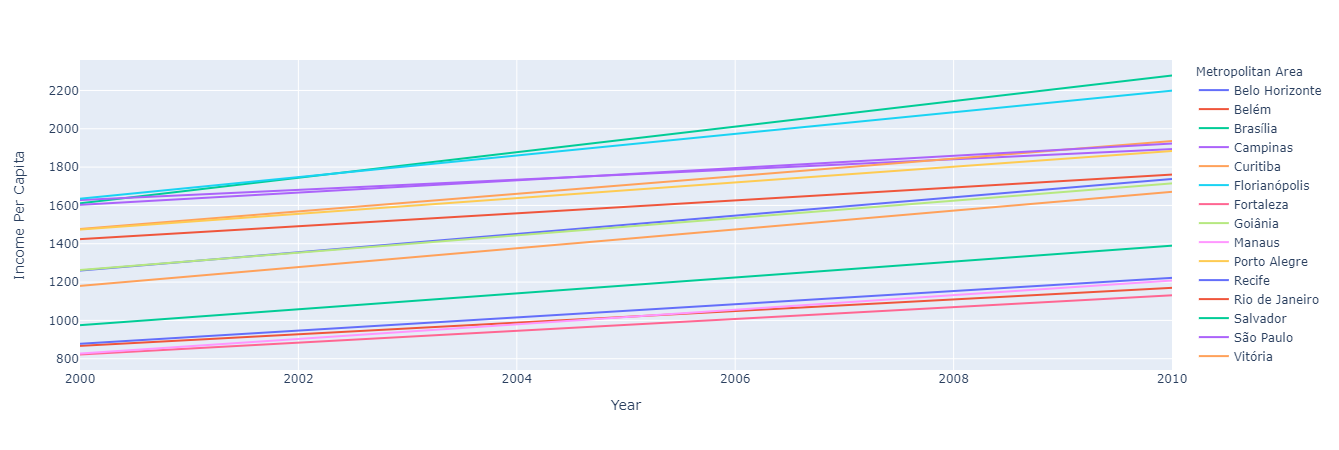

In [19]:
fig = px.line(
    data_frame=df_income_2000_2010
    , x='Year'
    , y='Income Per Capita'
    , color='Metropolitan Area'

)
fig.show()

In [20]:
dict_groups = {
    'Belo Horizonte':'Group B'
    ,'Belém':'Group C'
    ,'Brasília': 'Group A'
    ,'Campinas': 'Group B'
    ,'Curitiba': 'Group B'
    ,'Florianópolis': 'Group A'
    ,'Fortaleza':'Group C'
    ,'Goiânia':'Group B'
    ,'Manaus': 'Group C'
    ,'Porto Alegre': 'Group B'
    ,'Recife':'Group C'
    ,'Rio de Janeiro':'Group B'
    ,'Salvador':'Group C'
    ,'São Paulo': 'Group B'
    ,'Vitória':'Group B'
}

In [21]:
for i, scatter in enumerate(fig.data):
    key = fig.data[i].legendgroup
    fig.data[i].legendgroup = dict_groups[key]

In [22]:
dict_dash = {
    'Belo Horizonte':'dot'
    ,'Belém':'longdashdot'
    ,'Brasília': 'solid'
    ,'Campinas': 'dot'
    ,'Curitiba': 'dot'
    ,'Florianópolis': 'solid'
    ,'Fortaleza':'longdashdot'
    ,'Goiânia':'dot'
    ,'Manaus': 'longdashdot'
    ,'Porto Alegre': 'dot'
    ,'Recife':'longdashdot'
    ,'Rio de Janeiro':'dot'
    ,'Salvador':'longdashdot'
    ,'São Paulo': 'dot'
    ,'Vitória':'dot'
}

In [23]:
fig.data[0].line.dash

'solid'

In [24]:
for i, key in enumerate(dict_dash.keys()):
    fig.data[i].line.dash = dict_dash[key]

In [25]:
fig.layout.legend.tracegroupgap = 15

In [26]:
fig.layout.legend.traceorder = "reversed+grouped"

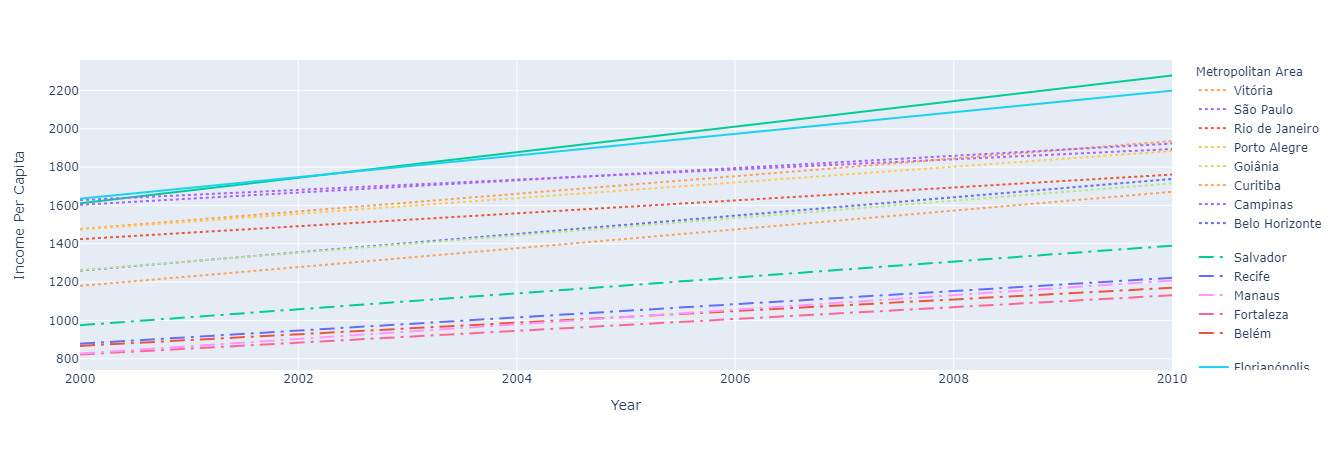

In [27]:
fig

## GDP

In [28]:
df_gdp = pd.read_csv('../data/economy/gdp/gdp_2002_2018_base18.csv', sep=';')

In [29]:
df_gdp = df_territory.merge(df_gdp, how='left', on='Cod')

In [30]:
df_gdp.drop(labels=['Cod', 'Municipio'], axis=1, inplace=True)

In [31]:
df_gdp.iloc[:,1:] = df_gdp.iloc[:,1:].astype(np.int64)

In [32]:
df_gdp = df_gdp.melt(df_gdp.columns[0], var_name='Year', value_name='GDP R$1000')

In [33]:
df_gdp = df_gdp.groupby(by=['Metropolitan Area', 'Year'], as_index=False).sum()

In [34]:
df_gdp

Metropolitan Area  Year  GDP R$1000
0      Belo Horizonte  2002   137470936
1      Belo Horizonte  2003   139053813
2      Belo Horizonte  2004   146912914
3      Belo Horizonte  2005   153592794
4      Belo Horizonte  2006   166315348
..                ...   ...         ...
250           Vitória  2014    78801206
251           Vitória  2015    72966685
252           Vitória  2016    66029724
253           Vitória  2017    63086570
254           Vitória  2018    74352397

[255 rows x 3 columns]

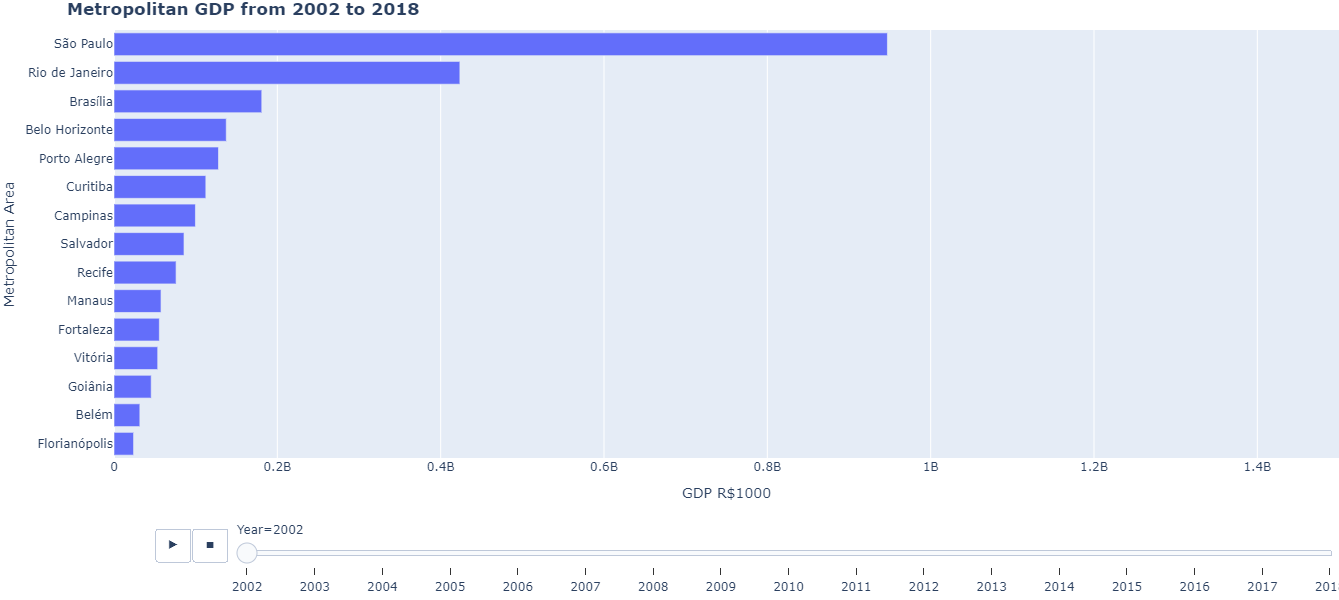

In [35]:
fig = px.bar(
    data_frame=df_gdp
    , y = 'Metropolitan Area'
    , x='GDP R$1000'
    , orientation='h'
    , animation_frame='Year'
    , range_x = [0,1.5e9]
    , title = '<b>Metropolitan GDP from 2002 to 2018<b>'
    , height=600 
    , width = 1380
)

fig.update_layout(yaxis={'categoryorder':"sum ascending"})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))

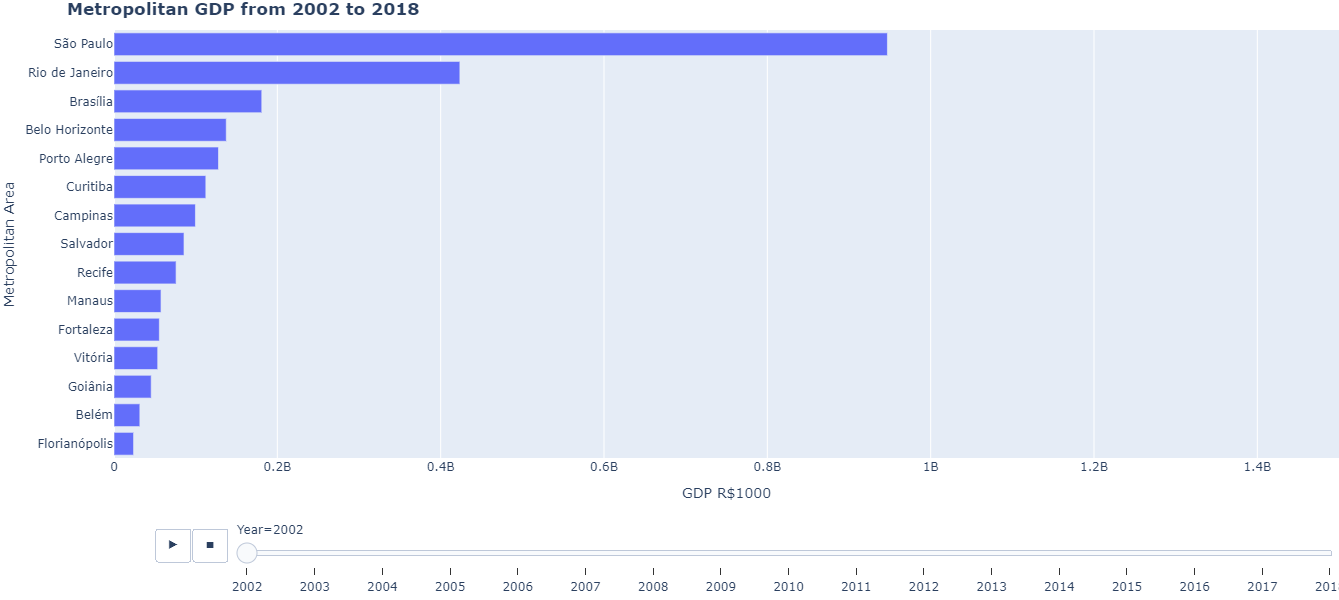

In [36]:
fig

In [37]:
pio.write_json(fig, '../data/economy/gdp/px_bar_gdp_02_18_dynamic.json')

## GDP 1970 A 1996

In [38]:
df_gdp_1970_1996 = pd.read_csv('../data/economy/gdp/gdp_1970_1996_base10.csv', sep=';')

In [39]:
df_gdp_1970_1996.rename(columns={'Código':'Cod'}, inplace=True)

In [40]:
df_gdp_1970_1996.fillna(0, inplace=True)

In [41]:
# deflating according to implicit deflator of gdp IPEA
df_gdp_1970_1996.iloc[:,3:] = df_gdp_1970_1996.iloc[:,3:] * 1.70763883589303

In [42]:
df_gdp_1970_1996 = df_territory.merge(df_gdp_1970_1996, on='Cod', how='left')

In [43]:
df_gdp_1970_1996.drop(labels=['Cod', 'Município', 'Sigla'], axis=1, inplace=True)

In [44]:
df_gdp_1970_1996 = df_gdp_1970_1996.melt(id_vars=['Metropolitan Area'], var_name='Year', value_name='GDP R$1000')

In [45]:
df_gdp_1970_1996 = df_gdp_1970_1996.groupby(by=['Metropolitan Area', 'Year'], as_index=False).sum()

In [46]:
df_gdp_70_18 = pd.concat(objs=[df_gdp, df_gdp_1970_1996], axis=0)

In [47]:
df_gdp_70_18.loc[:,'Year'] = df_gdp_70_18.loc[:,'Year'].astype(np.int32)

In [48]:
df_gdp_70_18.sort_values(by=['Year', 'Metropolitan Area'], inplace=True)

In [49]:
fig_70_18 = px.bar(
    data_frame=df_gdp_70_18
    , y = 'Metropolitan Area'
    , x='GDP R$1000'
    , orientation='h'
    , animation_frame='Year'
    , range_x = [0,1.5e9]
    , title = '<b>Metropolitan GDP from 1970 to 2018<b>'
    , height=600 
    , width = 1380
)

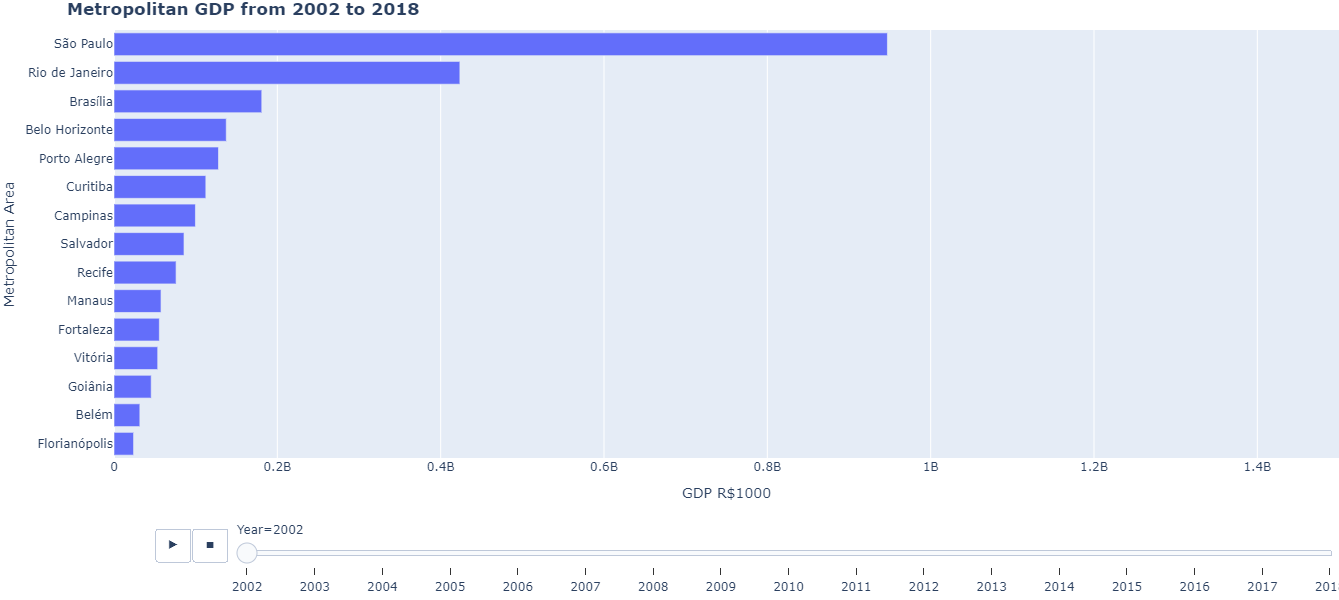

In [50]:
fig

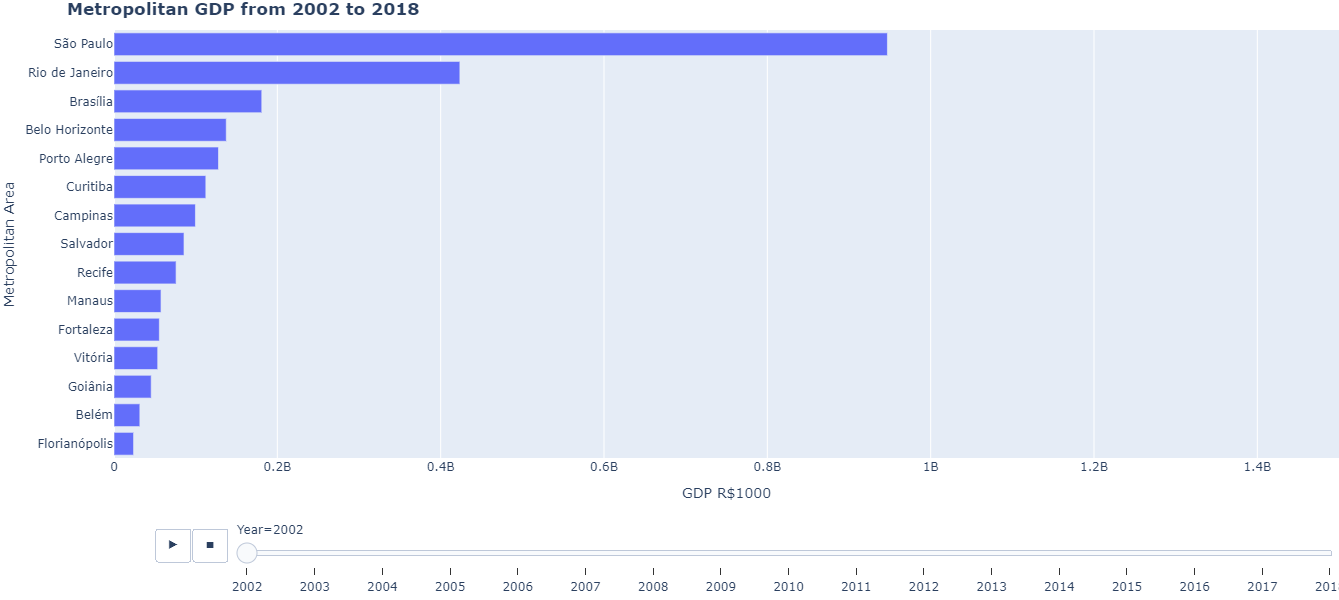

In [51]:
fig.update_layout(yaxis={'categoryorder':"sum ascending"})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [52]:
pio.write_json(fig, '../data/economy/gdp/px_bar_gdp_02_18_dynamic.json')

## Retrieving Population Data

In [53]:
df_pop = pd.read_csv('../data/pop/Tabela 200sidra  - pop 1970 a 2010.csv', sep=';', na_values='...')

In [54]:
df_pop.columns = ['Cod', 'Municipality', '1970', '1980', '1991', '2000', '2010', '2018']

In [55]:
#df_pop.drop(labels=['Municipio'], axis=1, inplace=True)

In [56]:
df_pop = df_pop.melt(id_vars=['Cod', 'Municipality'], var_name='Year', value_name='Pop')

In [57]:
df_pop = df_pop.dropna()

In [58]:
df_pop.loc[:,'Pop'] = df_pop.loc[:,'Pop'].astype(np.int64)

In [59]:
df_pop = df_pop.merge(right=df_territory, how='right', on='Cod')

In [60]:
df_pop.drop('Cod', axis=1).groupby(['Metropolitan Area', 'Year'], as_index=False).sum()

Metropolitan Area  Year      Pop
0     Belo Horizonte  1970  1646553
1     Belo Horizonte  1980  2590888
2     Belo Horizonte  1991  3409027
3     Belo Horizonte  2000  4235210
4     Belo Horizonte  2010  4744706
..               ...   ...      ...
85           Vitória  1980   715459
86           Vitória  1991  1075123
87           Vitória  2000  1350196
88           Vitória  2010  1582418
89           Vitória  2018  1828691

[90 rows x 3 columns]

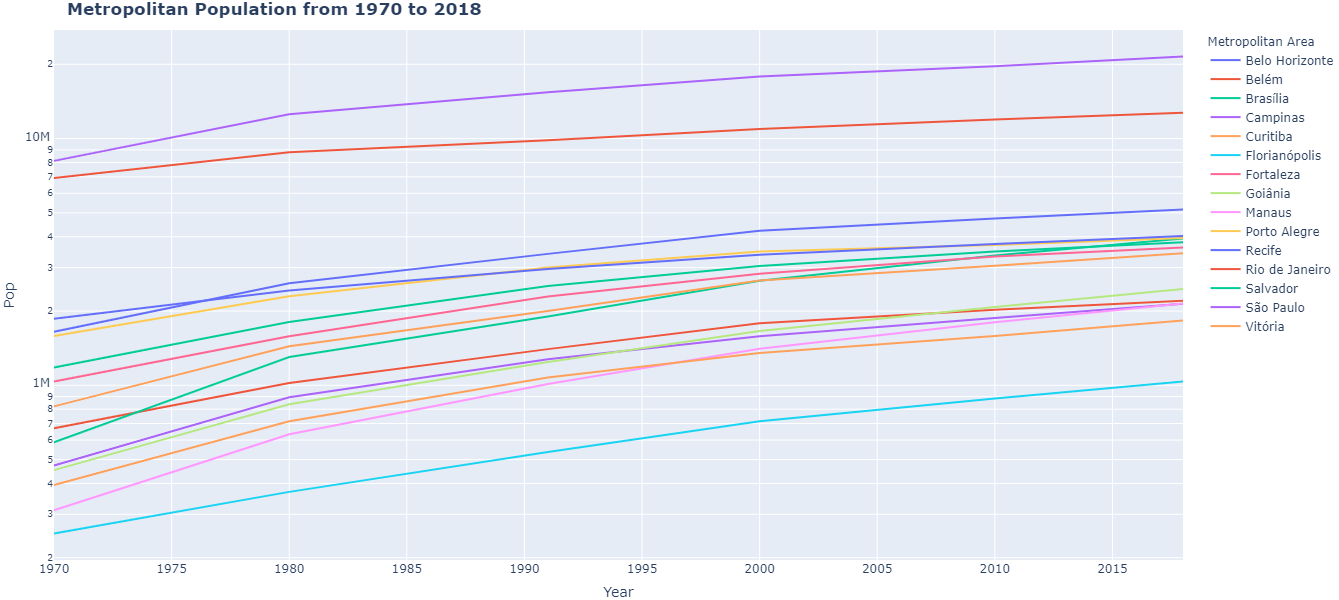

In [85]:
fig_pop_line = px.line(
    data_frame=df_pop.drop('Cod', axis=1).groupby(['Metropolitan Area', 'Year'], as_index=False).sum()
    , x='Year'
    , y='Pop'
    , color='Metropolitan Area'
    , log_y=True
    , title = '<b>Metropolitan Population from 1970 to 2018<b>'
    , height=600 
    , width = 1380
)
fig_pop_line.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [86]:
dict_groups = {
    'Belo Horizonte':'Group B'
    ,'Belém':'Group C'
    ,'Brasília': 'Group B'
    ,'Campinas': 'Group C'
    ,'Curitiba': 'Group B'
    ,'Florianópolis': 'Group D'
    ,'Fortaleza':'Group B'
    ,'Goiânia':'Group C'
    ,'Manaus': 'Group C'
    ,'Porto Alegre': 'Group B'
    ,'Recife':'Group B'
    ,'Rio de Janeiro':'Group A'
    ,'Salvador':'Group B'
    ,'São Paulo': 'Group A'
    ,'Vitória':'Group C'
}

In [87]:
for i, scatter in enumerate(fig_pop_line.data):
    key = scatter.legendgroup
    fig_pop_line.data[i].legendgroup = dict_groups[key]

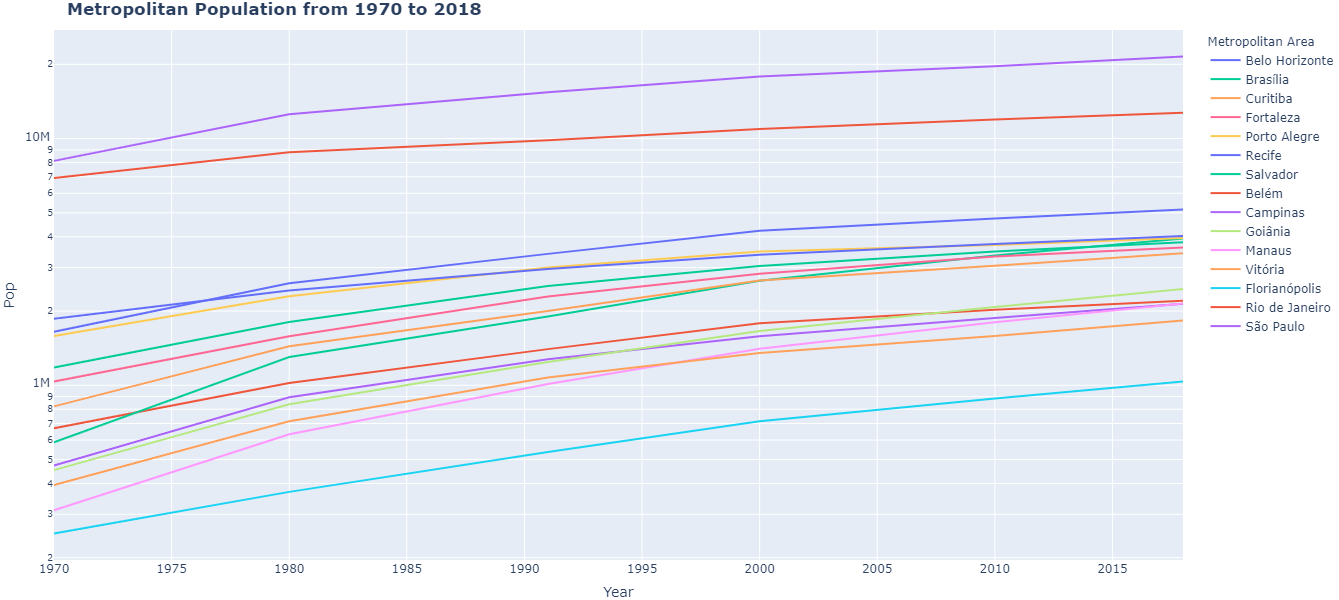

In [88]:
fig_pop_line

In [89]:
dict_dash = {
    'Belo Horizonte':'dash'
    ,'Belém':'longdashdot'
    ,'Brasília': 'dash'
    ,'Campinas': 'longdashdot'
    ,'Curitiba':'dash'
    ,'Florianópolis': 'solid'
    ,'Fortaleza':'dash'
    ,'Goiânia':'longdashdot'
    ,'Manaus': 'longdashdot'
    ,'Porto Alegre':'dash'
    ,'Recife':'dash'
    ,'Rio de Janeiro':'dot'
    ,'Salvador':'dash'
    ,'São Paulo': 'dot'
    ,'Vitória':'longdashdot'
}

In [90]:
for i, key in enumerate(dict_dash.keys()):
    fig_pop_line.data[i].line.dash = dict_dash[key]

In [91]:
fig_pop_line.layout.legend.tracegroupgap = 15

In [92]:
fig_pop_line.layout.legend.traceorder = "grouped"

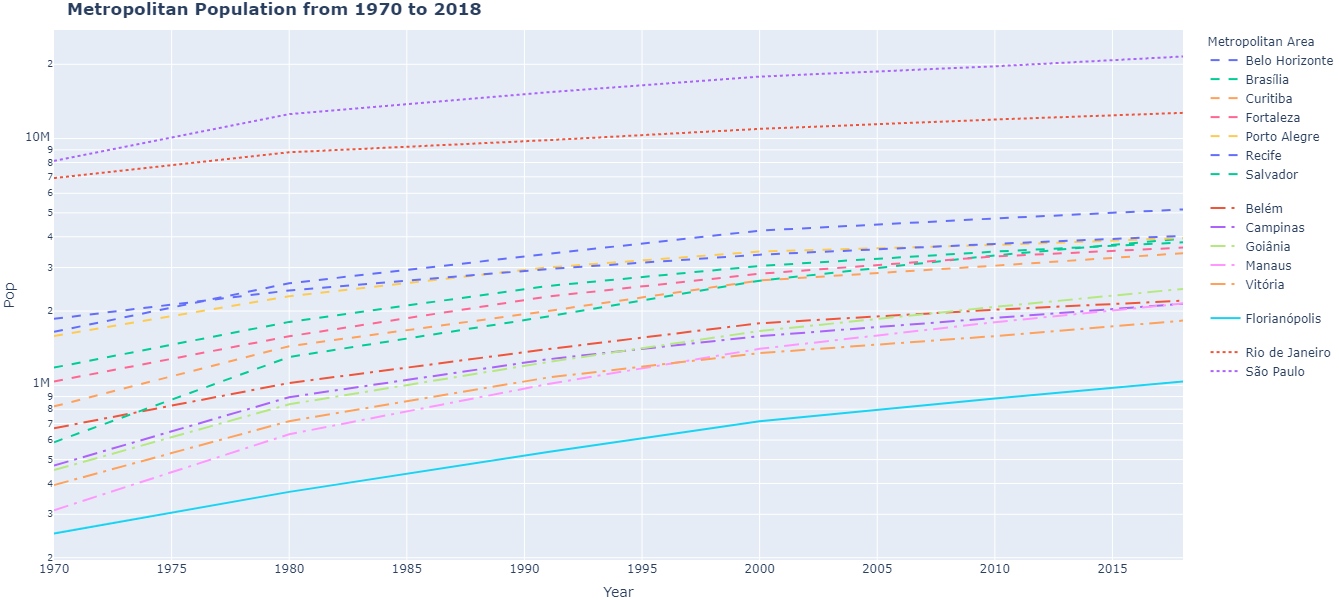

In [93]:
fig_pop_line

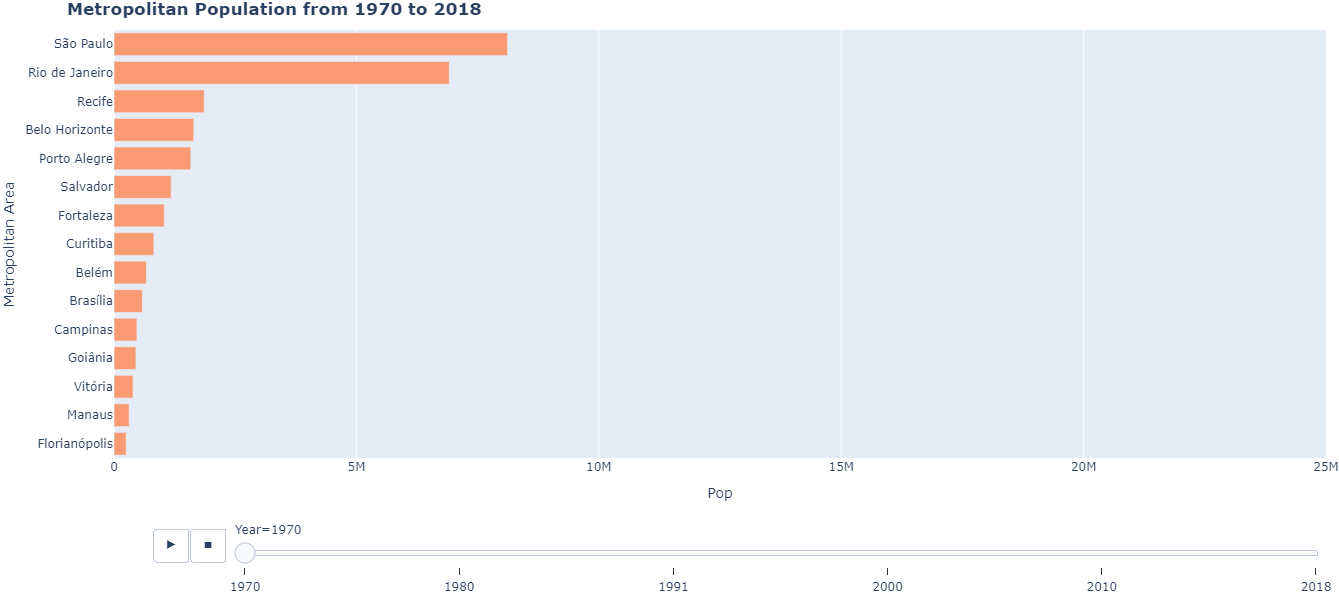

In [98]:
fig_pop = px.bar(
    data_frame=df_pop.drop('Cod', axis=1).groupby(['Metropolitan Area', 'Year'], as_index=False).sum().sort_values(by=['Year', 'Metropolitan Area'])
    , y='Metropolitan Area'
    , x='Pop'
    , animation_frame='Year'
    , orientation='h'
    , range_x = [0,2.5e7]
    , title = '<b>Metropolitan Population from 1970 to 2018<b>'
    , height=600 
    , width = 1380
    , color_discrete_sequence=['#FA9A73']
#    , hover_name='Metropolitan Area'
    , hover_data=['Year', 'Pop']
)
fig_pop.update_layout(yaxis={'categoryorder':"sum ascending"})
fig_pop.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig_pop.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [ ]:
pio.write_json(fig_pop, '../data/pop/px_bar_pop_70_18_dynamic.json')

## Retrieving GDP per capita

In [102]:
df_gdp_70_18.Year.unique()

array([1970, 1975, 1980, 1985, 1996, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [99]:
df_pop = df_pop.drop('Cod', axis=1).groupby(['Metropolitan Area', 'Year'], as_index=False).sum().sort_values(by=['Year', 'Metropolitan Area'])

In [105]:
df_pop.Year.unique()

array(['1970', '1980', '1991', '2000', '2010', '2018'], dtype=object)

In [ ]:
df_pop.merge(df_gdp_70_18, how='left', on=['Metropolitan Area', 'Year'])

In [109]:
df_pop_estimated = pd.read_csv('../data/pop/pop_1970_2018.csv', sep=';')

In [ ]:
df

In [114]:
df_pop_estimated = df_territory.merge(df_pop_estimated, on='Cod', how='left')

In [118]:
df_pop_estimated.drop(labels=['Cod', 'Município'], axis=1, inplace=True)

In [125]:
df_temp = df_pop_estimated.groupby(by=['Metropolitan Area'], as_index=False).sum().melt(id_vars=['Metropolitan Area'], var_name='Year', value_name='Pop')

In [140]:
df_temp['Year'] = df_temp.Year.astype(np.int32)

In [144]:
df_gdp_70_18 = df_gdp_70_18.merge(right=df_temp, how='inner', left_on=['Metropolitan Area', 'Year'], right_on=['Metropolitan Area', 'Year'])

In [152]:
df_gdp_70_18['GDP per capita'] = df_gdp_70_18['GDP R$1000'] / df_gdp_70_18.Pop * 1000

In [159]:
df_gdp_70_18[df_gdp_70_18.Year > 1996]

Metropolitan Area  Year       GDP R$1000       Pop  GDP per capita
45     Belo Horizonte  2002   137,470,936.00   4406819       31,195.05
46              Belém  2002    31,674,817.00   1866561       16,969.61
47           Brasília  2002   180,989,175.00   2813306       64,333.27
48           Campinas  2002    99,720,336.00   1646574       60,562.32
49           Curitiba  2002   112,477,090.00   2797437       40,207.19
..                ...   ...              ...       ...             ...
265            Recife  2018   107,509,937.00   4031485       26,667.58
266    Rio de Janeiro  2018   565,696,625.00  12712762       44,498.33
267          Salvador  2018   117,996,716.00   3795668       31,087.21
268         São Paulo  2018 1,179,573,402.00  21510595       54,836.86
269           Vitória  2018    74,352,397.00   1828691       40,658.81

[225 rows x 5 columns]

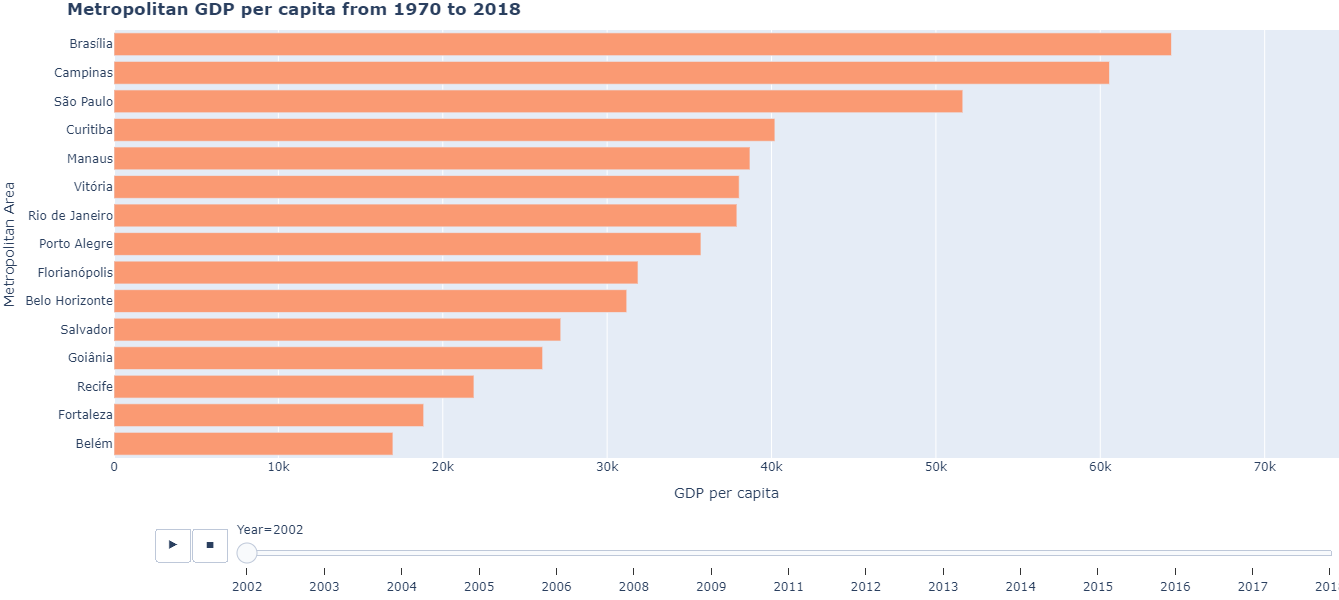

In [160]:
fig_gdp_percapita = px.bar(
    data_frame=df_gdp_70_18[df_gdp_70_18.Year > 1996]
    , y='Metropolitan Area'
    , x='GDP per capita'
    , animation_frame='Year'
    , orientation='h'
    , range_x = [0, df_gdp_70_18['GDP per capita'].max()]
    , title = '<b>Metropolitan GDP per capita from 1970 to 2018<b>'
    , height=600 
    , width = 1380
    , color_discrete_sequence=['#FA9A73']
#    , hover_name='Metropolitan Area'
#    , hover_data=['Year', 'Pop']
)
fig_gdp_percapita.update_layout(yaxis={'categoryorder':"sum ascending"})
fig_gdp_percapita.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig_gdp_percapita.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [162]:
pio.write_json(fig_gdp_percapita, '../data/economy/px_bar_gdppercapita_2002_2018_dynamic.json')

In [146]:
df_gdp_70_18.Year.unique()

array([1970, 1980, 1996, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
df_territory = pd.read_csv('../data/territory/list_arranjos_pop.csv', sep=';')

In [ ]:
df_territory.merge(right=df_income_2000, on='cod', )

In [ ]:
df_income_91 = pd.read_csv(
    '../data/economics/income/income all sources 1991 census bme.csv'
    , sep=';'
    , encoding='ANSI'
    , decimal=','
    , thousands='.'
)

In [ ]:
df_income_91.columns

In [ ]:
df_income_91.drop(
    labels= [
        'Código do Nível Geográfico'
        , 'Nível Geográfico'
        , 'Item Geográfico'
        , 'Código do Item Temporal'
        , 'Nível Temporal'
        , 'Ordem Geográfica'
        , 'Freqüência'
        , 'Observações']
    , axis=1
    , inplace=True
)

In [ ]:
df_income_91.columns

In [ ]:
df_income_91.info()


In [ ]:
df = pd.read_csv('../data/economy/ipea_pib_1970_2010.csv', sep=';')

In [ ]:
df.rename(columns={'Código':'Cod'}, inplace=True)

In [ ]:
df_territory = pd.read_csv('../data/territory/list_arranjos_pop.csv', sep=';')

In [ ]:
df_territory = df_territory[~df_territory['Territory'].str.startswith('Demais')]

In [ ]:
df_territory.rename(columns={'Territory':'Metropolitan Area'}, inplace=True);

In [ ]:
df_pib = df_territory.merge(right=df, on='Cod', how='left')

In [ ]:
df_pib = df_pib.groupby(by='Metropolitan Area').sum()

In [ ]:
df_pib.drop(axis=1, labels='Cod', inplace=True)

In [ ]:
df_pib.reset_index(inplace=True)

In [ ]:
df_pib = df_pib.melt(id_vars='Metropolitan Area', var_name='Year', value_name='GDP x 1000')

In [ ]:
df_pib.loc[:,'GDP x 1000'] = df_pib.loc[:,'GDP x 1000']  * 1.70763883589303

In [ ]:
df_pib['Year'] = df_pib.Year.astype(np.int32)

In [ ]:
df_pib = df_pib[df_pib.Year <= 1996]

In [ ]:
px.line(
    data_frame=df_test
    , x='Year'
    , y = 'GDP R$1000'
    , color= 'Metropolitan Area'
#    , log_y=True
    , labels={'GDP x 1000':'log(GDP x 1000)'}
)

In [ ]:
df_pib.columns = df_gdp.columns

In [ ]:
df_test = pd.concat(objs=[df_pib, df_gdp])

In [ ]:
px.line(
    data_frame=df_test
    , x='Year'
    , y = 'GDP R$1000'
    , color= 'Metropolitan Area'
#    , log_y=True
    , labels={'GDP x 1000':'log(GDP x 1000)'}
)

In [ ]:
fig_70_18 = px.bar(
    data_frame=df_test
    , y = 'Metropolitan Area'
    , x='GDP R$1000'
    , orientation='h'
    , animation_frame='Year'
    , range_x = [0,1.5e9]
    , title = '<b>Metropolitan GDP from 1970 to 2018<b>'
    , height=600 
    , width = 1380
)

In [ ]:
fig_70_18

In [ ]:
fig_70_18.update_layout(yaxis={'categoryorder':"sum ascending"})
fig_70_18.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig_70_18.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [ ]:
pio.write_json(fig_70_18, '../data/economy/gdp/px_bar_gdp_dynamic.json')

In [ ]:
df_territory.merge()

In [ ]:
df_territory.info()

In [ ]:
df.columns

In [ ]:
df.loc[:,['Código', 'renda_1970', 'renda_1980', 'renda_1991','renda_2000']]